This notebook demonstrates how to do Meanshift to do image segmentation on an image using the [Scikit-Learn](http://scikit-learn.org/stable/) library.

This is the code that accompanies the article at http://www.chioka.in/meanshift-algorithm-for-the-rest-of-us-python/

In [35]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs
from itertools import cycle
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = 16, 12

We will load in the image and display the original image for reference.

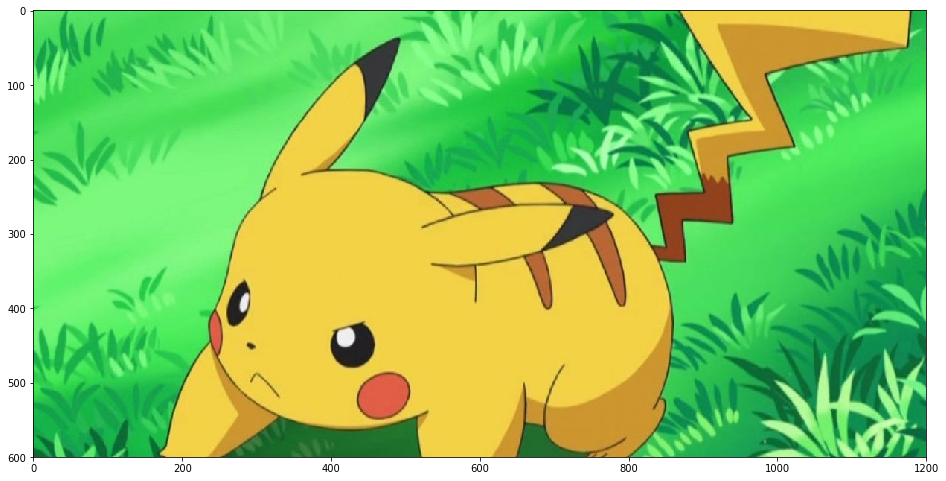

In [43]:
image = Image.open('bread.jpg')

# Image is (687 x 1025, RGB channels)
image = np.array(image)
original_shape = image.shape

# Flatten image.
X = np.reshape(image, [-1, 3])

plt.imshow(image)

Estimate the kernel bandwidth to use from our image (the datapoints).

In [44]:
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=1000, n_jobs=-1)
print(bandwidth)

27.2967853676


Now run Meanshift on the image to do the image segmentation, which is stored in *X*.

In [45]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=-1)
ms.fit(X)

MeanShift(bandwidth=27.296785367601885, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=-1, seeds=None)

In [46]:
labels = ms.labels_
print(labels.shape)
cluster_centers = ms.cluster_centers_
print(cluster_centers.shape)

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

(720000,)
(19, 3)
number of estimated clusters : 19


In [47]:
segmented_image = np.reshape(labels, original_shape[:2])  # Just take size, ignore RGB channels.

Now, let's display the segmented image and the original image.

(-0.5, 1199.5, 599.5, -0.5)

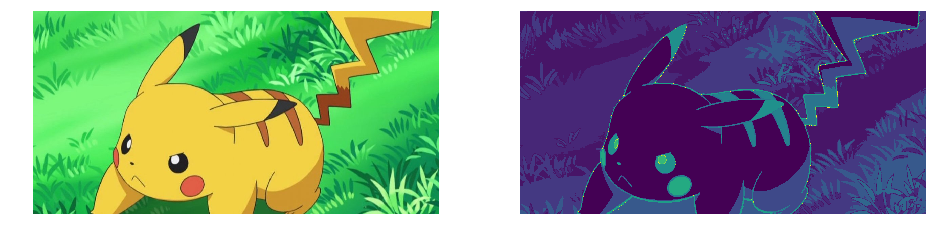

In [48]:
plt.figure(2)
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.axis('off')